In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import svm, datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("orange and apple.csv")

In [3]:
data.shape

(40, 3)

In [4]:
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
data['Class'].value_counts()

orange    20
apple     20
Name: Class, dtype: int64

In [7]:
data.isnull().sum()

Weight    0
Size      0
Class     0
dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

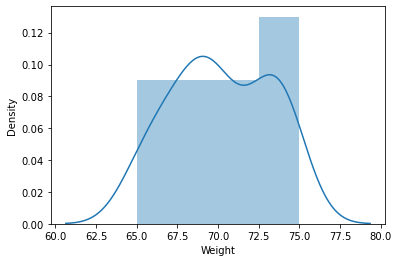

In [8]:

sns.distplot(data['Weight'])

In [9]:
data['Weight'].skew()  
# range between -0.5 to +0.5  fairly symentrical;

-0.0677938185886952

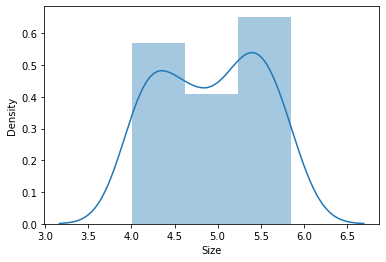

In [10]:
sns.distplot(data['Size']);

In [11]:
data['Size'].skew()   # symentrical

-0.057162171651201854

In [12]:
data.corr()

,Weight,Size
Weight,1.000000,0.765027
Size,0.765027,1.000000


In [13]:
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [14]:
X=data.iloc[:,0:2].values
y=data.iloc[:,2:3].values


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [38]:
X_train.shape

(32, 2)

In [39]:
X_test.shape

(8, 2)

In [40]:
y_train.shape

(32, 1)

In [19]:
y_test.shape

(8, 1)

In [41]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [42]:
Y_pred = classifier.predict(X_test)


In [22]:
#y_test["Predictions"] = Y_pred

In [43]:
y_test

array([['orange'],
       ['orange'],
       ['apple'],
       ['orange'],
       ['apple'],
       ['orange'],
       ['apple'],
       ['apple']], dtype=object)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
#accuracy = float(cm.diagonal().sum())/len(y_test)
accuracy=accuracy_score(y_test,Y_pred)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)




Accuracy Of SVM For The Given Dataset :  1.0


In [45]:
cm

array([[4, 0],
       [0, 4]])

In [26]:
# converting string to numerical

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

In [47]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [48]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0])

In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',C=1,gamma=0.5)
classifier.fit(X_train,y_train)

SVC(C=1, gamma=0.5, kernel='linear')

In [50]:
y_pred=classifier.predict(X_test)

In [51]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0])

In [33]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test,y_pred)

array([[4, 0],
       [0, 4]])

In [44]:
# we need to install the mlxtend library

In [55]:
#pip install mlxtend

In [56]:
from mlxtend.plotting import plot_decision_regions

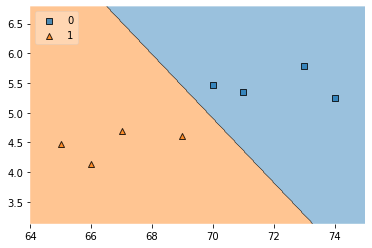

In [57]:
# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=classifier, legend=2)
plt.show()

In [ ]:
# Grid search , to check best parameters by the model

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
#Grid Search  to find the value from kernel , c , gamma
parameters=[{'kernel':['linear'], 'C':[1,10,100,1000,10000], 'gamma':[0.5, 0.1, 0.05,0.07,0.08]},
           {'kernel':['rbf'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]

In [60]:
grid_model_svc= GridSearchCV(classifier, parameters)
grid_model_svc.fit(X_train, y_train)
grid_model_svc.best_score_

1.0

In [61]:
grid_model_svc.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'linear'}